In [23]:
import numpy as np
import pandas as pd
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [117]:
data = pd.read_csv("Mall_Customers.csv", sep=',')

In [118]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [119]:
data = data.drop(['CustomerID','Gender'],axis=1)

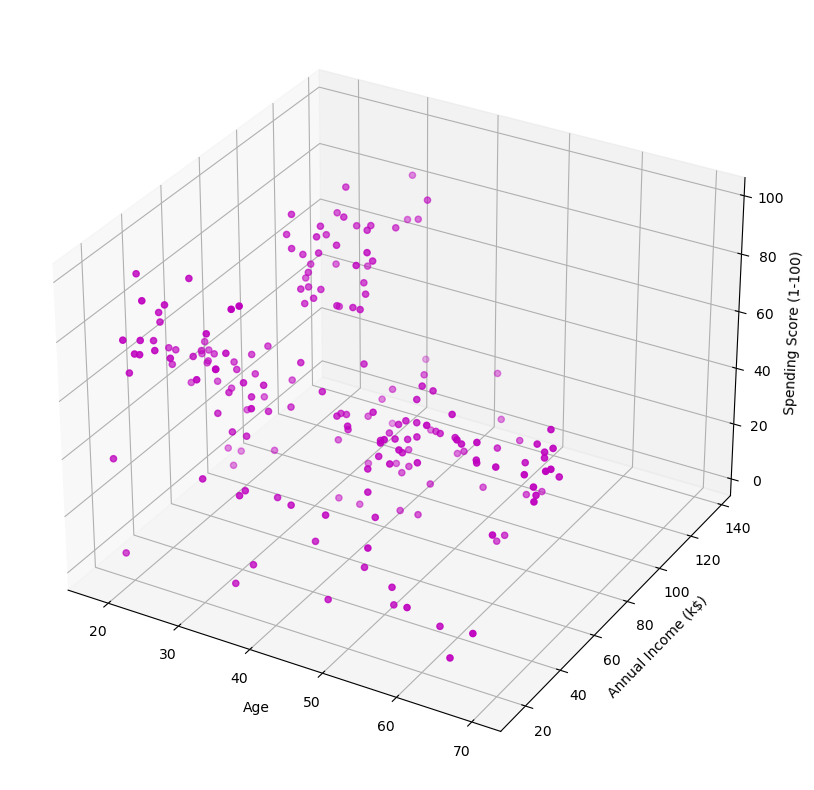

In [120]:
x = data.iloc[:, 0]
y = data.iloc[:, 1]
z = data.iloc[:, 2]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='m', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [121]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [122]:
columns = data.columns
newdata = pd.DataFrame(scaled_data, columns=columns)

In [123]:
newdata.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [124]:
x = newdata.iloc[:, 0]
y = newdata.iloc[:, 1]
z = newdata.iloc[:, 2]

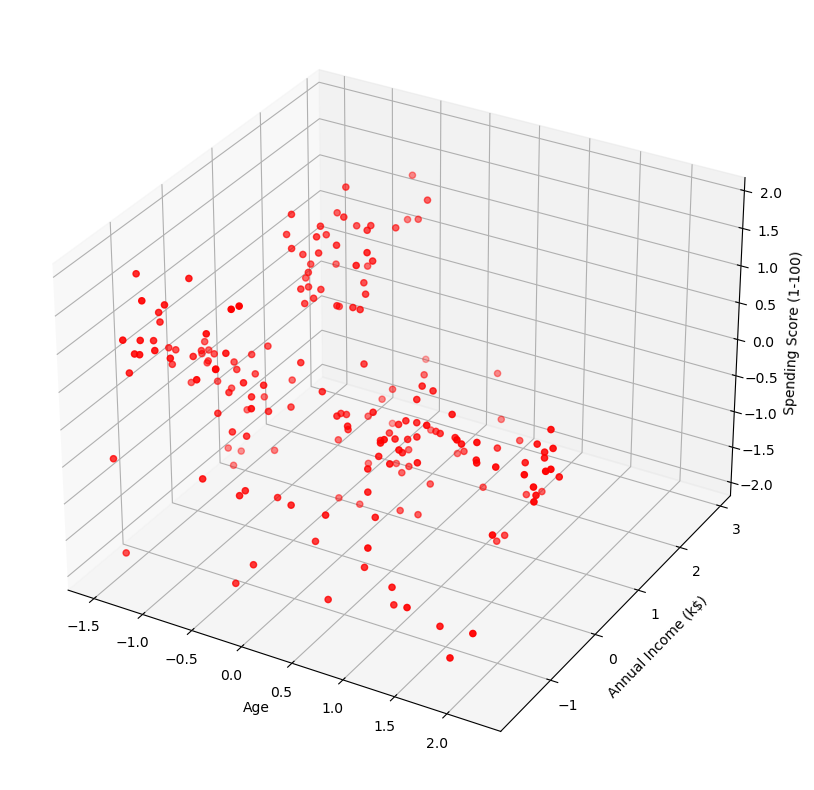

In [125]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [247]:
optics =OPTICS(min_samples=10)
optics.fit(newdata)

OPTICS(min_samples=10)

In [248]:
labels = optics.labels_

In [267]:
np.unique(labels)

array([-1,  0,  1,  2,  3])

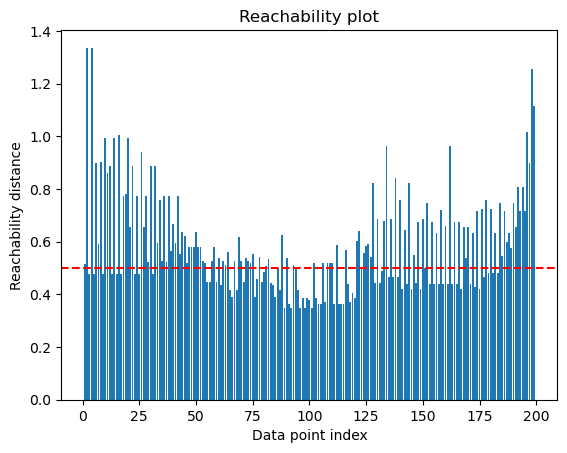

In [265]:
reachability = optics.reachability_

plt.bar(range(len(newdata)), reachability)
plt.xlabel("Data point index")
plt.ylabel("Reachability distance")
plt.title("Reachability plot")

threshold = 0.5
plt.axhline(y=threshold, color="red", linestyle="--")

plt.show()

In [252]:
n_clusters = len(np.unique(labels))
print("Number of clusters:", n_clusters)

Number of clusters: 5


In [253]:
data['groups'] = np.nan
for i in range(len(data)):
    data.loc[i, 'groups'] = labels[i]

In [254]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100),groups
0,19,15,39,-1.0
1,21,15,81,2.0
2,20,16,6,-1.0
3,23,16,77,2.0
4,31,17,40,-1.0


In [268]:
noise_points = data[data['groups'] == -1]
cluster_1 = data[data['groups'] == 0]
cluster_2 = data[data['groups'] == 1]
cluster_3 = data[data['groups'] == 2]
cluster_4 = data[data['groups'] == 3]

In [271]:
print('Nombre de point des points isolés : ',len(noise_points))
print('Nombre de point du Cluster 1      : ',len(cluster_1))
print('Nombre de point du Cluster 2      : ',len(cluster_2))
print('Nombre de point du Cluster 3      : ',len(cluster_3))
print('Nombre de point du Cluster 4      : ',len(cluster_4))

Nombre de point des points isolés :  96
Nombre de point du Cluster 1      :  21
Nombre de point du Cluster 2      :  30
Nombre de point du Cluster 3      :  18
Nombre de point du Cluster 4      :  35


In [273]:
data = data.drop(index = data[data['groups'] == -1].index)

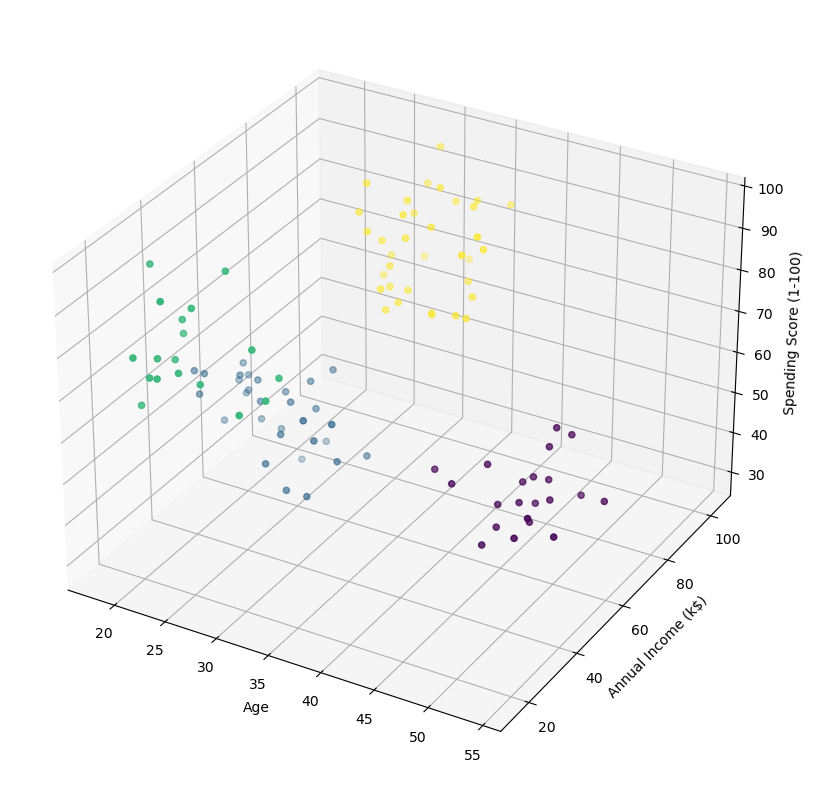

In [275]:
x = data.iloc[:, 0]
y = data.iloc[:, 1]
z = data.iloc[:, 2]
c = data.iloc[:, 3]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=c, marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

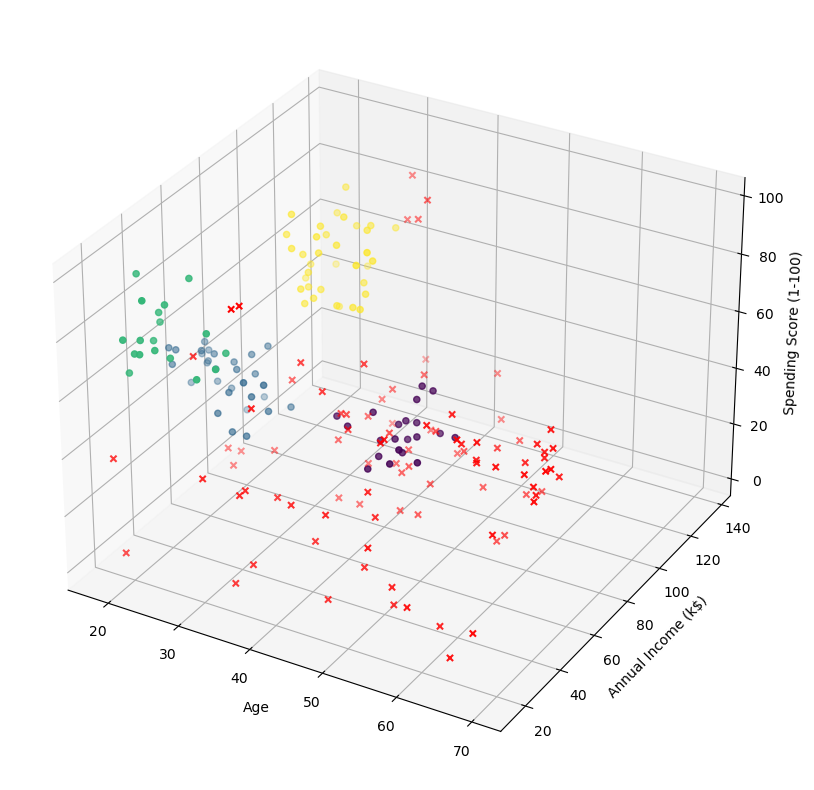

In [276]:
x = data.iloc[:, 0]
y = data.iloc[:, 1]
z = data.iloc[:, 2]
c = data.iloc[:, 3]

x_noise = noise_points.iloc[:, 0]
y_noise = noise_points.iloc[:, 1]
z_noise = noise_points.iloc[:, 2]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=c, marker='o')
ax.scatter(x_noise, y_noise, z_noise, c='red', marker='x')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()